# Project 3

## Step 1. Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [ ]:
df = pd.read_csv("ad.csv")
df.head(20)

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
5,8.7,48.9,7.2
6,57.5,32.8,11.8
7,120.2,19.6,13.2
8,8.6,2.1,4.8
9,199.8,2.6,10.6


In [ ]:
df.shape

(200, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Sales", axis = 1), df.Sales, test_size=0.5, random_state=0)

## Step 2. Linear Regression of Original Data

### Fit the linear regression and get training errors

In [ ]:
m1 = LinearRegression().fit(X_train,y_train)

# Training data errors
train_err = y_train - m1.predict(X_train)
train_err.head(20)

158   -3.603665
191    1.586221
50    -0.784194
0      1.414310
94     1.123373
110   -0.980411
95     0.430493
64     0.631003
167   -0.725689
41    -0.343397
69     0.938222
49     1.578118
48    -1.212337
85     0.144307
13     1.080812
161   -0.627779
23    -0.787966
186    0.971900
135   -2.998791
20    -0.084619
Name: Sales, dtype: float64

### The distribution of training errors by histogram and QQ plot

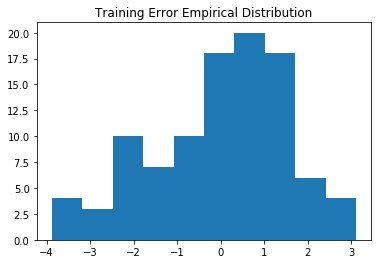

In [ ]:
plt.hist(train_err)
plt.title("Training Error Empirical Distribution")
plt.show()

In [ ]:
#sm.qqplot(train_err, line = '45')
#plt.title("QQ Plot of Training Error")
#plt.show()

### Validation Errors

In [ ]:
val_err = y_test - m1.predict(X_test)
val_err.head(20)

18     1.258687
170    1.041333
107    1.901195
98     1.165756
177   -0.154806
182    2.288054
5     -6.051451
146   -1.622754
12    -1.863375
152    0.338477
61     1.130941
125    1.565513
180    0.317244
154    0.223663
80     0.161207
7      1.103820
33    -1.167416
130   -9.378257
37    -1.554674
74    -0.224366
Name: Sales, dtype: float64

### The distribution of validation errors by histogram and QQ plot

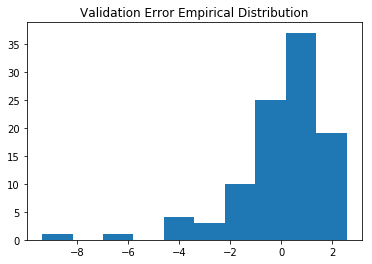

In [ ]:
plt.hist(val_err)
plt.title("Validation Error Empirical Distribution")
plt.show()

In [ ]:
#sm.qqplot(val_err, line = '45')
#plt.title("QQ Plot of Validation Error")
#plt.show()

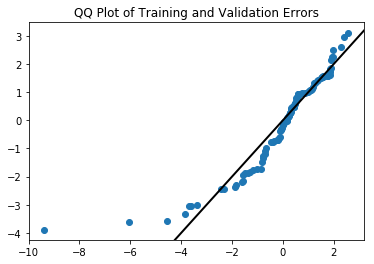

In [ ]:
plt.scatter(np.sort(val_err), np.sort(train_err))
#= plt.xlim()
ypoints = xpoints = plt.ylim()
plt.plot(xpoints, ypoints, color='k', lw=2, scalex=False, scaley=False)
plt.title("QQ Plot of Training and Validation Errors")
plt.show()

## Step 3. Remove Outliers

### Remove outliers in training dataset

In [ ]:
train_err_std = np.std(train_err)
train_err_std

1.5855941202931005

In [ ]:
train_err_mean = np.mean(train_err)
train_err_mean

-1.2079226507921704e-15

In [ ]:
train_outlier_index = []
for i in train_err.index.tolist():
    if abs(train_err[i] - train_err_mean)/train_err_std >= 2:
        train_outlier_index.append(i)
train_outlier_index

[158, 78, 35, 166]

In [ ]:
X_train_new = X_train.drop(train_outlier_index)
X_train_new.head(20)

,TV,Radio
191,75.5,10.8
50,199.8,3.1
0,230.1,37.8
94,107.4,14.0
110,225.8,8.2
95,163.3,31.6
64,131.1,42.8
167,206.8,5.2
41,177.0,33.4
69,216.8,43.9


In [ ]:
y_train_new = y_train.drop(train_outlier_index)
y_train_new.head(20)

191     9.9
50     11.4
0      22.1
94     11.5
110    13.4
95     16.9
64     18.0
167    12.2
41     17.1
69     22.3
49      9.7
48     14.8
85     15.2
13      9.7
161    13.3
23     15.5
186    10.3
135    11.6
20     18.0
15     22.4
Name: Sales, dtype: float64

### Remove outliers in validation dataset

In [ ]:
val_err_std = np.std(val_err)
val_err_std

1.8017268174630465

In [ ]:
val_err_mean = np.mean(val_err)
val_err_mean

-0.020379030550195295

In [ ]:
val_outlier_index = []
for i in val_err.index.tolist():
    if abs(val_err[i] - val_err_mean)/val_err_std >= 2.1:  #1.5
        val_outlier_index.append(i)
val_outlier_index

[5, 130, 75, 126]

In [ ]:
X_test_new = X_test.drop(val_outlier_index)
X_test_new.head(20)

,TV,Radio
18,69.2,20.5
170,50.0,11.6
107,90.4,0.3
98,289.7,42.3
177,170.2,7.8
182,56.2,5.7
146,240.1,7.3
12,23.8,35.1
152,197.6,23.3
61,261.3,42.7


In [ ]:
y_test_new = y_test.drop(val_outlier_index)
y_test_new.head(20)

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
37     14.7
74     17.0
183    26.2
145    10.3
Name: Sales, dtype: float64

## Step 4. Refitting LR to Get New Errors

### New Training Errors

In [ ]:
m2 = LinearRegression().fit(X_train_new, y_train_new)

train_err_new = y_train_new - m2.predict(X_train_new)
train_err_new.head(20)

191    1.342949
50    -0.787133
0      1.350147
94     0.924825
110   -0.955061
95     0.271036
64     0.379136
167   -0.723394
41    -0.485041
69     0.831062
49     1.317015
48    -1.209458
85     0.079831
13     0.886094
161   -0.935287
23    -0.786786
186    0.867882
135   -3.407708
20    -0.135947
15     1.036647
Name: Sales, dtype: float64

In [ ]:
len(train_err_new) # 4 Outliers were removed from training data

96

### New Validation Errors

In [ ]:
val_err_new = y_test_new - m2.predict(X_test_new)
val_err_new.head(20)

18     0.972740
170    0.751311
107    1.718101
98     1.189996
177   -0.224366
182    2.028087
146   -1.569709
12    -2.275712
152    0.265565
61     1.104723
125    1.339214
180    0.241181
154    0.140997
80    -0.132588
7      0.909081
33    -1.111839
37    -1.925765
74    -0.274193
183    1.931696
145    0.876098
Name: Sales, dtype: float64

In [ ]:
len(val_err_new) # 4 Outliers were removed from validation data

96

### Distribution of new errors

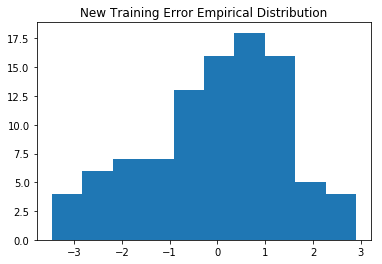

In [ ]:
plt.hist(train_err_new)
plt.title("New Training Error Empirical Distribution")
plt.show()

# Very close to normal distribution

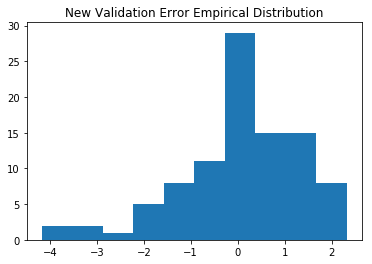

In [ ]:
plt.hist(val_err_new)
plt.title("New Validation Error Empirical Distribution")
plt.show()

# Closer to normally distributed than before (which was left skewed)

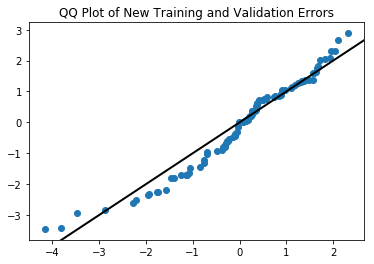

In [ ]:
plt.scatter(np.sort(val_err_new), np.sort(train_err_new))
ypoints = xpoints = plt.xlim()
plt.plot(xpoints, ypoints, color='k', lw=2, scalex=False, scaley=False)
plt.title("QQ Plot of New Training and Validation Errors")
plt.show()

### Linear Regression Coefficients

In [ ]:
b1, b2 = m2.coef_
b0 = m2.intercept_

In [ ]:
b0

3.1033771534379913

In [ ]:
b1

0.04220740144567341

In [ ]:
b2

0.20990880335863601

## Step 5 Training Models of SAA and Deterministic

### SAA Model

In [ ]:
from pyomo.environ import *
import pyomo.environ as pyo
import pyomo.gdp as gdp
from pyomo.opt import SolverFactory

np.random.seed(123)

In [ ]:
# Lower & Upper Bound for x1 and x2
l1 = min(X_train_new['TV'])
u1 = max(X_train_new['TV'])

l2 = min(X_train_new['Radio'])
u2 = max(X_train_new['Radio'])

In [ ]:
def SAA_model(t_err_sample):
    m = pyo.ConcreteModel() 
    
    m.N = pyo.Set(initialize=range(1, N+1))
    # Decision variables

    # first-stage variables
    m.x1 = Var(within=NonNegativeReals, bounds=(l1,u1))
    m.x2 = Var(within=NonNegativeReals, bounds=(l2,u2))
    
    # second-stage variables
    m.yA = Var(m.N, within=NonNegativeReals)
    m.yB = Var(m.N, within=NonNegativeReals)

    # Objective function
    m.obj = Objective(expr = - 0.1 * m.x1 - 0.5 * m.x2 +\
                      (1/N) * sum(3 * m.yA[n] + 5 * m.yB[n] for n in m.N), sense=pyo.maximize)

    # Constraints
    m.s1 = Constraint(expr = m.x1 + m.x2 <= 200)
    m.s2 = Constraint(expr = m.x1 - 0.5 * m.x2 >= 0)
    
    m.s3 = ConstraintList()
    m.s4 = ConstraintList()
    m.s5 = ConstraintList()
    m.s6 = ConstraintList()
    
    for n in m.N:
        m.s3.add(m.yA[n] <= 8)
        m.s4.add(m.yB[n] <= 12)
        m.s5.add(3 * m.yA[n] + 2 * m.yB[n] <= 36)
        m.s6.add(m.yA[n] + m.yB[n] <= b0 + m.x1 * b1 + m.x2 * b2 + t_err_sample[n-1])

    return m

In [ ]:
N = 200
t_err_sample = np.random.choice(train_err_new, N)

m_SAA = SAA_model(t_err_sample)
pyo.SolverFactory('glpk').solve(m_SAA)

MPO_SAA = m_SAA.obj()
MPO_SAA

40.340002953123786

In [ ]:
x1_hat_SAA = m_SAA.x1()
x1_hat_SAA

180.173137516166

In [ ]:
x2_hat_SAA = m_SAA.x2()
x2_hat_SAA

19.8268624838345

### Deterministic Model

In [ ]:
def det_model():
    m = pyo.ConcreteModel() 
    
    # Decision variables

    # first-stage variables
    m.x1 = Var(within=NonNegativeReals, bounds=(l1,u1))
    m.x2 = Var(within=NonNegativeReals, bounds=(l2,u2))
    
    # second-stage variables
    m.yA = Var(within=NonNegativeReals)
    m.yB = Var(within=NonNegativeReals)

    # Objective function
    m.obj = Objective(expr = - 0.1 * m.x1 - 0.5 * m.x2 +\
                      3 * m.yA + 5 * m.yB, sense=pyo.maximize)

    # Constraints
    m.s1 = Constraint(expr = m.x1 + m.x2 <= 200)
    m.s2 = Constraint(expr = m.x1 - 0.5 * m.x2 >= 0)
    m.s3 = Constraint(expr = m.yA <= 8)
    m.s4 = Constraint(expr = m.yB <= 12)
    m.s5 = Constraint(expr = 3 * m.yA + 2 * m.yB <= 36)
    m.s6 = Constraint(expr = m.yA + m.yB <= b0 + m.x1 * b1 + m.x2 * b2)

    return m

In [ ]:
m_det = det_model()
pyo.SolverFactory('glpk').solve(m_det)

MPO_det = m_det.obj()
MPO_det

41.3736307350858

In [ ]:
x1_hat_det = m_det.x1()
x1_hat_det

173.434076837714

In [ ]:
x2_hat_det = m_det.x2()
x2_hat_det

26.5659231622856

## Step 6. Validation

In [ ]:
scipy.stats.chisquare(val_err, train_err).pvalue

4.672610918930368e-48

### SAA Model

#### Model Validation Sample Average Estimate (MVSAE)

In [ ]:
def val_model(x1_hat, x2_hat, error):
    m = pyo.ConcreteModel() 
    
    # Decision variables
    # second-stage variables
    m.yA = Var(within=NonNegativeReals)
    m.yB = Var(within=NonNegativeReals)

    # Objective function
    m.obj = Objective(expr = - 0.1 * x1_hat - 0.5 * x2_hat +\
                      3 * m.yA + 5 * m.yB, sense=pyo.maximize)

    # Constraints
    m.s3 = Constraint(expr = m.yA <= 8)
    m.s4 = Constraint(expr = m.yB <= 12)
    m.s5 = Constraint(expr = 3 * m.yA + 2 * m.yB <= 36)
    m.s6 = Constraint(expr = m.yA + m.yB <= b0 + x1_hat * b1 + x2_hat * b2 + error)

    return m

In [ ]:
SAA_val_objs = []
M = 1000

for i in range(0, M):
    err = np.random.choice(val_err_new)
    m_SAA_val = val_model(x1_hat_SAA, x2_hat_SAA, err)
    pyo.SolverFactory('glpk').solve(m_SAA_val)
    SAA_val_objs.append(m_SAA_val.obj())

In [ ]:
SAA_mean_obj = np.mean(SAA_val_objs)
SAA_se = np.std(SAA_val_objs)/sqrt(M)

print('Model Predicted Objective:', MPO_SAA)
print('95% CI Model Validation Sample Average Estimate:', [SAA_mean_obj - 1.96*SAA_se, SAA_mean_obj + 1.96*SAA_se])

Model Predicted Objective: 40.340002953123786
95% CI Model Validation Sample Average Estimate: [40.252318389720976, 40.72336787426406]


### Deterministic Model

#### Model Validation Sample Average Estimate (MVSAE)

In [ ]:
det_val_objs = []
M = 1000

for i in range(0, M):
    err = np.random.choice(val_err_new)
    m_det_val = val_model(x1_hat_det, x2_hat_det, err)
    pyo.SolverFactory('glpk').solve(m_det_val)
    det_val_objs.append(m_det_val.obj())

In [ ]:
det_mean_obj = np.mean(det_val_objs)
det_se = np.std(det_val_objs)/sqrt(M)

print('Model Predicted Objective:', MPO_det)
print('95% CI Model Validation Sample Average Estimate:', [det_mean_obj - 1.96*det_se, det_mean_obj + 1.96*det_se])

Model Predicted Objective: 41.3736307350858
95% CI Model Validation Sample Average Estimate: [39.81077578429651, 40.13550458541907]


In [ ]:
SAA_CI = [round(SAA_mean_obj - 1.96*SAA_se, 3), round(SAA_mean_obj + 1.96*SAA_se, 3)]
det_CI = [round(det_mean_obj - 1.96*det_se, 3), round(det_mean_obj + 1.96*det_se, 3)]

In [ ]:
compare = pd.DataFrame({'Methodology':['Deterministic LP', 'SLP with SAA'],
                        'x1':[x1_hat_det, x1_hat_SAA],
                        'x2':[x2_hat_det, x2_hat_SAA],
                        'MPO':[MPO_det, MPO_SAA],
                        'MVSAE':[det_CI, SAA_CI]
                    })
compare

,Methodology,x1,x2,MPO,MVSAE
0,Deterministic LP,173.434077,26.565923,41.373631,"[39.811, 40.136]"
1,SLP with SAA,180.173138,19.826862,40.340003,"[40.252, 40.723]"
